# Введение в численные методы оптимизации (Ю. Е. Нестеров Введение в выпуклую оптимизацию, гл. 1 $\S$ 1.1)

 1. Обзор материала весеннего семестра
 2. Постановка задачи
 3. Общая схема решения
 4. Сравнение методов оптимизации
 5. Методы одномерной минимизации


## Обзор материала весеннего семестра

Также на [странице курса](https://github.com/amkatrutsa/MIPT-Opt#spring-term-2020).

1. Методы решения задач **безусловной** оптимизации
    - Одномерная минимизация (**уже сегодня!**)
    - Градиентный спуск и способы его ускорения
    - Метод Ньютона
    - Квазиньютоновские методы
    - Метод сопряжённых градиентов  
    - Решение задачи наименьших квадратов
2. Методы решения задач **условной** оптимизации
    - Методы проекции градиента и условного градиента
    - Методы штрафных и барьерных функций
    - Метод модифицированой функции Лагранжа

## Постановка задачи

\begin{equation}
\begin{split}
& \min_{x \in S} f_0(x)\\
\text{s.t. } & f_j(x) = 0, \; j = 1,\ldots,m\\
& g_k(x) \leq 0, \; k = 1,\ldots,p
\end{split}
\end{equation}
где $S \subseteq \mathbb{R}^n$, $f_j: S \rightarrow \mathbb{R}, \; j = 0,\ldots,m$, $g_k: S \rightarrow \mathbb{R}, \; k=1,\ldots,p$

Все функции как минимум непрерывны. 

Важный факт</span>: задачи **нелинейной** оптимизации 

в их самой общей форме являются **численно неразрешимыми**!

## Аналитические результаты
- Необходимое условие первого порядка: 

если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда 

$$
f'(x^*) = 0
$$

- Необходимое условие второго порядка 

если $x^*$ точка локального минимума дважды дифференцируемой функции $f(x)$, тогда 

$$
f'(x^*) = 0 \quad \text{и} \quad f''(x^*) \succeq 0
$$

- Достаточное условие: 

пусть $f(x)$ дважды дифференцируемая функция, и пусть точка $x^*$ удовлетворяет условиям

$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$

тогда $x^*$ является точкой строго локального минимума функции $f(x)$.

**Замечание**: убедитесь, что Вы понимаете, как доказывать эти

результаты!

## Особенности численного решения

1. Точно решить задачу принципиально невозможно из-за погрешности машинной арифметики
2. Необходимо задать критерий обнаружения решения
3. Необходимо определить, какую информацию о задаче использовать

## Общая итеративная схема

Дано: начальное приближение $x$, требуемая точность $\varepsilon$.

```python
def GeneralScheme(x, epsilon):
    
    while StopCriterion(x) > epsilon:
        
        OracleResponse = RequestOracle(x)
        
        UpdateInformation(I, x, OracleResponse)
        
        x = NextPoint(I, x)
        
    return x
```

### Вопросы
1. Какие критерии остановки могут быть?
2. Что такое оракул и зачем он нужен?
3. Что такое информационная модель?
4. Как вычисляется новая точка?

#### Критерии остановки
1. Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Сходимость по функции: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Выполнение необходимого условия 
$$
\| f'(x_k) \|_2 < \varepsilon
$$

Но ведь $x^*$ неизвестна!

Тогда

\begin{align*}
& \|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq \\
& \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
\end{align*}

Аналогично для сходимости по функции, 

однако иногда можно оценить $f^*$! 

**Замечание**: лучше использовать относительные изменения 

этих величин! 

Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


#### Что такое оракул?
**Определение**: оракулом называют некоторое абстрактное 

устройство, которое отвечает на последовательные вопросы 

метода

Аналогия из ООП: 

- оракул - это виртуальный метод базового класса
- каждая задача - производный класс
- оракул определяется для каждой задачи отдельно согласно общему определению в базовом классе

**Концепция чёрного ящика**
1. Единственной информацией, получаемой в ходе работы итеративного метода, являются ответы оракула
2. Ответы оракула являются *локальными*

#### Информация о задаче
1. Каждый ответ оракула даёт **локальную** информацию о поведении функции в точке
2. Агрегируя все полученные ответы оракула, обновляем информацию о **глобальном** виде целевой функции:
    - кривизна
    - направление убывания
    - etc

#### Вычисление следующей точки

$$
x_{k+1} = x_{k} + \alpha_k h_k
$$

- **Линейный поиск**: фиксируется направление $h_k$ и производится поиск по этому направлению "оптимального" значения  $\alpha_k$
- **Метод доверительных областей**: фиксируется допустимый размер *области* по некоторой норме $\| \cdot  \| \leq \alpha$ и *модель* целевой функции, которая хорошо её аппроксимирует в выбранной области. 
    
    Далее производится поиск направления $h_k$, минимизирующего модель целевой функции и не выводящего точку $x_k + h_k$ за пределы доверительной области

#### Вопросы
1. Как выбрать $\alpha_k$?
2. Как выбрать $h_k$?
3. Как выбрать модель?
4. Как выбрать область?
5. Как выбрать размер области? 

<span style="color:red">
    В курсе рассматривается только линейный поиск!</span> 
    
Однако несколько раз копцепция метода доверительных областей 

будет использована.

## Как сравнивать методы оптимизации?
Для заданного класса задач сравнивают следующие величины:
1. Сложность
    - аналитическая: число обращений к оракулу для решения задачи с точностью $\varepsilon$
    - арифметическая: общее число всех вычислений, необходимых для решения задачи с точностью $\varepsilon$
2. Скорость сходимости
3. Эксперименты

### Скорости сходимости 

_1._ Сублинейная

$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$

где $\alpha < 0$ и $ 0 < C < \infty$

_2._ Линейная (геометрическая прогрессия)

$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$

где $q \in (0, 1)$ и $ 0 < C < \infty$

_3._ Сверхлинейная 

$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, 
$$

где $q \in (0, 1)$, $ 0 < C < \infty$ и $p > 1$

_4._ Квадратичная

$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$

где $q \in (0, 1)$ и $ 0 < C < \infty$

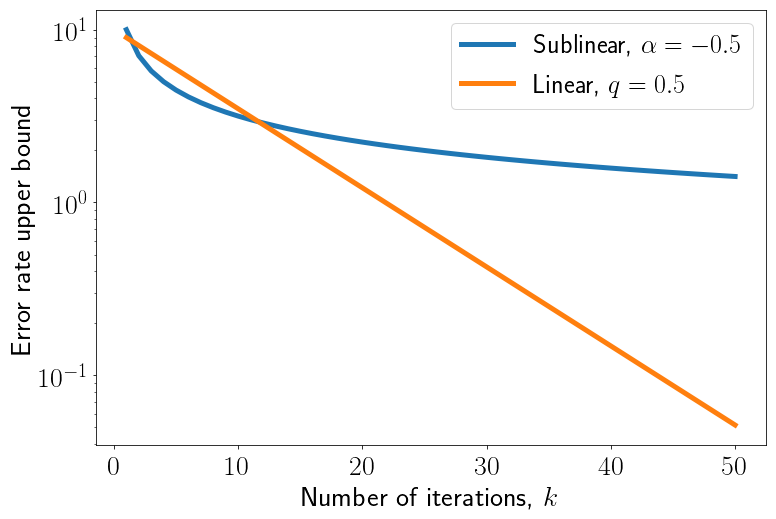

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

USE_COLAB = False
if not USE_COLAB:
    plt.rc("text", usetex=True)

import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 50
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$", linewidth=5)
# plt.semilogy(np.arange(1, num_iter+1), superlinear, linewidth=5,
#              label=r"Superlinear, $q = 0.5, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$", linewidth=5)
# plt.semilogy(np.arange(1, num_iter+1), quadratic, 
#              label=r"Quadratic, $q = 0.5$", linewidth=5)
plt.xlabel("Number of iterations, $k$", fontsize=28)
plt.ylabel("Error rate upper bound", fontsize=28)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Значение теорем сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 6)
1. Что дают теоремы сходимости
     - класс задач, для которых можно рассчитывать на применимость метода (важно не завышать условия!)
         - выпуклость
         - гладкость
     - качественное поведение метода
         - существенно ли начальное приближение
         - по какому функционалу есть сходимость
     - оценку скорости сходимости
         - теоретическая оценка поведения метода без проведения экспериментов
         - определение факторов, которые влияют на сходимость (обусловленность, размерность, etc)
         - иногда заранее можно выбрать число итераций для достижения заданной точности 

2. Что **НЕ** дают теоремы сходимости
    - сходимость метода **ничего не говорит** о целесообразности его применения
    - оценки сходимости зависят от неизвестных констант - неконструктивный характер
    - учёт ошибок округления и точности решения вспомогательных задач
    
**Мораль**: нужно проявлять разумную осторожность 

и здравый смысл!

## Классификация задач
1. Безусловная оптимизация
    - целевая функция липшицева
    - градиент целевой функции липшицев
2. Условная оптимизация
    - многогранник
    - множество простой структуры
    - общего вида

## Классификация методов
1. Методы нулевого порядка: оракул возвращает только значение функции $f(x)$

2. Методы первого порядка: оракул возвращает значение функции $f(x)$ и её градиент $f'(x)$

3. Методы второго порядка: оракул возвращает значение функции $f(x)$, её градиент $f'(x)$ и гессиан $f''(x)$.

**Вопрос**: существуют ли методы более высокого порядка?

1. Одношаговые методы 

$$
x_{k+1} = \Phi(x_k)
$$

2. Многошаговые методы

$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## Одномерная минимизация
**Определение**. Функция $f(x)$ называется унимодальной на $[a, b]$, если существует такая точка $x^* \in [a, b]$, что 
- $f(x_1) > f(x_2)$ для любых $a \leq x_1 < x_2 < x^*$, 

и 
- $f(x_1) < f(x_2)$ для любых $x^* < x_1 < x_2 \leq b$.

**Вопрос**: какая геометрия унимодальных функций?

### Метод дихотомии

Идея из информатики первого семестра: 

делим отрезок $[a,b]$ на две равные части 

пока не найдём минимум унимодальной функции.

- $N$ - число вычислений функции $f$
- $K = \frac{N - 1}{2}$ - число итераций

Тогда

$$
|x_{K+1} - x^*| \leq \frac{b_{K+1} - a_{K+1}}{2} = \left( \frac{1}{2} \right)^{\frac{N-1}{2}} (b - a) \approx 0.5^{K} (b - a) 
$$

In [55]:
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [56]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

9.313225746154785e-10


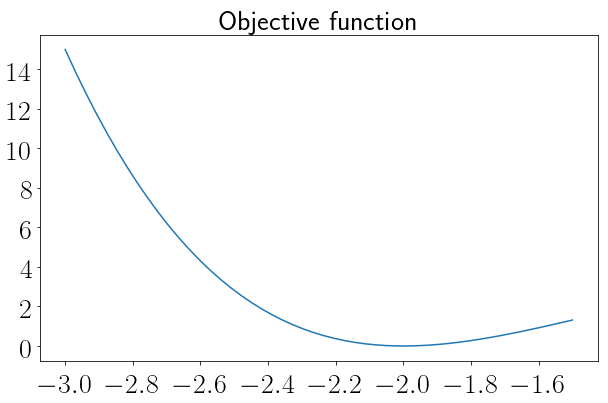

In [57]:
import numpy as np

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = -1.5
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Метод золотого сечения
Идея: 

делить отрезок $[a,b]$ не на две равные насти, 

а в пропорции "золотого сечения".

Оценим скорость сходимости аналогично методу дихотомии:

$$
|x_{K+1} - x^*| \leq b_{K+1} - a_{K+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^K(b-a),
$$
где $\tau = \frac{\sqrt{5} + 1}{2}$.

- Константа геометрической прогрессии **больше**, чем у метода дихотомии
- Количество вызовов функции **меньше**, чем у метода дихотомии

In [20]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

In [58]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

6.93889390875399e-18
9.549014390504221e-18
9.313225746154785e-10


### Сравнение методов одномерной минимизации

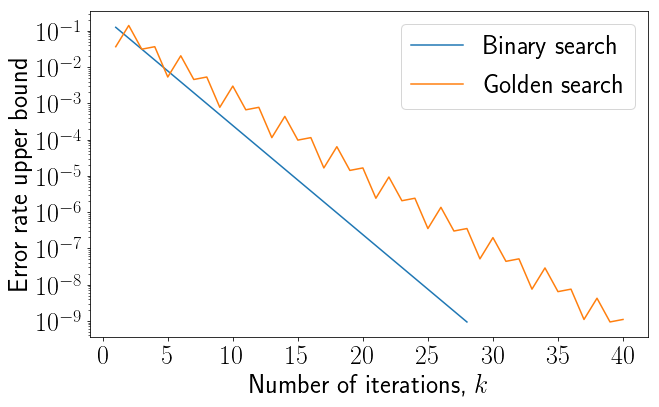

In [22]:
plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 26)
_ = plt.yticks(fontsize = 26)

In [59]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

20.2 µs ± 275 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
122 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Пример иного поведения методов

$$
f(x) = \sin(\sin(\sin(\sqrt{x}))), \; x \in [2, 60]
$$

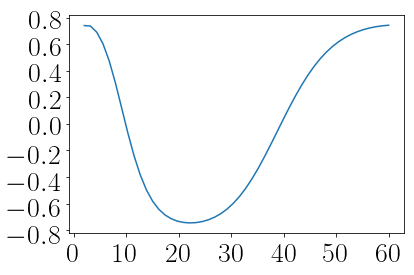

In [60]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-8
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

## Сравнение скорости сходимости и времени работы методов

### Метод дихотомии

In [61]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Метод золотого сечения

In [62]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Сходимость

Text(0, 0.5, 'Error rate upper bound')

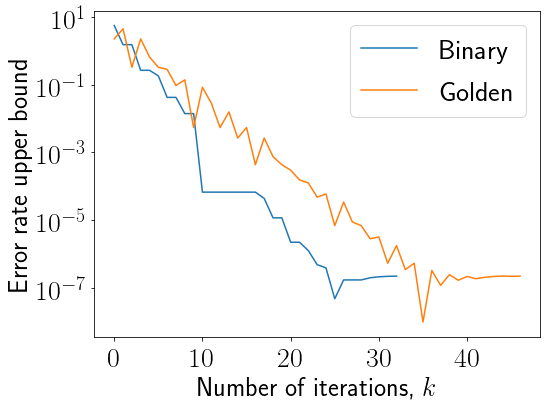

In [27]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=28)
plt.xticks(fontsize=28)
_ = plt.yticks(fontsize=28)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)

### Время работы

In [64]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

489 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
505 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Резюме
1. Введение в численные методы оптимизации
2. Общая схема работы метода
3. Способы сравнения методов оптимизации
4. Зоопарк задач и методов
5. Одномерная минимизация

## Методы спуска. Градиентный спуск и его ускоренные модификации

## Что такое методы спуска?

Последовательность $x_k$ генерируется по правилу

$$
x_{k+1} = x_k + \alpha_k h_k
$$

так что

$$
f(x_{k+1}) < f(x_k)
$$

Направление $h_k$ называется *направлением убывания*.

**Замечание**: существуют методы, которые не требуют монотонного убывания функции от итерации к итерации.

```python
def DescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeDescentDirection(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x + alpha * h
        
    return x


```

## Способ 1: направление убывания
Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ вдоль некоторого направления убывания $h, \|h\|_2 = 1$:

$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$

Из условия убывания

$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$

и переходя к пределу при $\alpha \rightarrow 0$:

$$
\langle f'(x), h \rangle \leq 0
$$

Также из неравенства Коши-Буняковского-Шварца

$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Таким образом, направление антиградиента 

$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$

даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид

$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

## Способ 2: схема Эйлера решения ОДУ

Рассмотрим обыкновенное диференциальное уравнение вида:

$$
\frac{dx}{dt} = -f'(x(t))
$$

и дискретизуем его на равномерной сетке с шагом $\alpha$:

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$

где $x_k \equiv x(t_k)$ и $\alpha = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$

$$
x_{k+1} = x_k - \alpha f'(x_k),
$$

которое в точности совпадает с выражением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

## Способ 3: минимизация квадратичной оценки сверху 
#### (А. В. Гасников Метод универсального градиентного спуска https://arxiv.org/abs/1711.00394)

Глобальная оценка сверху на функцию $f$ в точке $x_k$:

$$
f(y) \leq f(x_k) + \langle f'(x_k), y - x_k \rangle + \frac{L}{2} \|y - x_k \|_2^2 = g(y), 
$$

где $\lambda_{\max}(f''(x)) \leq L$ для всех допустимых $x$.

Справа &mdash; квадратичная форма, точка минимума которой имеет аналитическое выражение:

\begin{align*}
& g'(y^*) = 0 \\
& f'(x_k) + L (y^* - x_k) = 0 \\
& y^* = x_k - \frac{1}{L}f'(x_k) = x_{k+1}
\end{align*}

Этот способ позволяет оценить значение шага как $\frac{1}{L}$. Однако часто константа $L$ неизвестна.

## Итого: метод градиентного спуска &mdash; дёшево и сердито

```python
def GradientDescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeGradient(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x - alpha * h
        
    return x

```

## Как выбрать шаг $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

Список подходов:
- Постоянный шаг 

$$
\alpha_k = \overline{\alpha}
$$

- Априорно заданная последовательность, например

$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$

- Наискорейший спуск

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

- Требование **достаточного** убывания, требование **существенного** убывания и условие кривизны: для некоторых $\beta_1, \beta_2$, таких что $0 < \beta_1 < \beta_2 < 1$ найти $x_{k+1}$ такую что

    - Достаточное убывание: $f(x_{k+1}) \leq f(x_k) + \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $ f(x_k) - f(x_{k+1}) \geq \beta_1 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Существенное убывание: $f(x_{k+1}) \geq f(x_k) + \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $
    f(x_k) - f(x_{k+1}) \leq \beta_2 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Условие кривизны: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Обычно коэффициенты выбирают так: $\beta_1 \in (0, 0.3)$, а $\beta_2 \in (0.9, 1)$

### Анализ и мотивация подходов к выбору шага $\alpha_k$
- Постоянный шаг: самое простое и неэффективное решение
- Априорно заданная последовательность: немногим лучше постоянного шага
- Наискорейший спуск: самое лучшее решение, но применимо только если вспомогательная задача решается аналитически или ооооооочень быстро. <br></br>
То есть почти всегда неприменимо :)
- Требование достаточного убывания, требование существенного убывания и условие кривизны:
    - требование достаточного убывания гарантирует, что функция в точке $x_{k+1}$ не превосходит линейной аппроксимации с коэффициентом наклона $\beta_1$
    - требование существенного убывания гарантирует, что функция в точке $x_{k+1}$ убывает не меньше, чем линейная аппроксимация c коэффициентом наклона $\beta_2$
    - условие кривизны гарантирует, что угол наклона касательной в точке $x_{k+1}$ не меньше, чем угол наклона касательной в точке $x_k$, <br></br>
умноженный на $\beta_2$ 

Требование существенного убывания и условие кривизны обеспечивают убывание функции по выбранному направлению $h_k$. Обычно выбирают одно из них.

#### Альтернативные названия
- Требование достаточного убывания $\equiv$ правило Армихо
- Требование достаточного убывания + условие кривизны $\equiv$ правило Вольфа
- Требование достаточного убывания + требование существенного убывания $\equiv$ правило Гольдштейна

## Зачем нужно условие существенного убывания?

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import ipywidgets as ipywidg
import numpy as np
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
from tqdm import tqdm

<IPython.core.display.Javascript object>


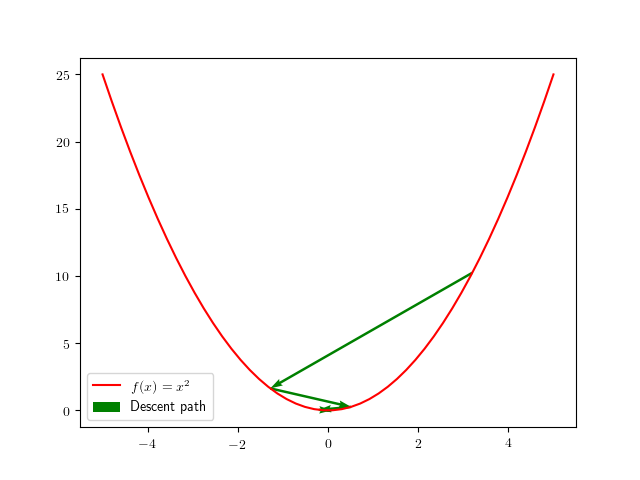

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(valu…

In [2]:
f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)



def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

In [3]:
def plot_alpha(f, grad, x, h, alphas, beta1, beta2):
    df = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        df[i] = f(x + alpha * h)
    upper_bound = f(x) + beta1 * alphas * grad(x) * h
    lower_bound = f(x) + beta2 * alphas * grad(x) * h
    plt.plot(alphas, df, label=r"$f(x + \alpha h)$")
    plt.plot(alphas, upper_bound, label="Upper bound")
    plt.plot(alphas, lower_bound, label="Lower bound")
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.legend(loc="best", fontsize=18)

<IPython.core.display.Javascript object>


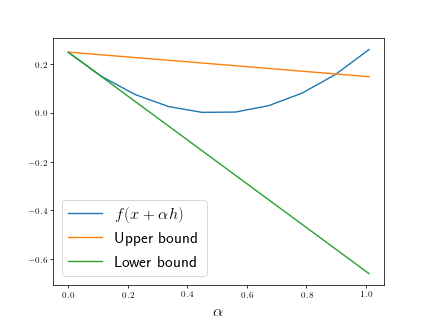

In [6]:
f = lambda x: x**2
grad = lambda x: 2 * x
beta1 = 0.1
beta2 = 0.9
x0 = 0.5
plot_alpha(f, grad, x0, -grad(x0), np.linspace(1e-3, 1.01, 10), beta1, beta2)

## $f(x) = x\log x$

<IPython.core.display.Javascript object>


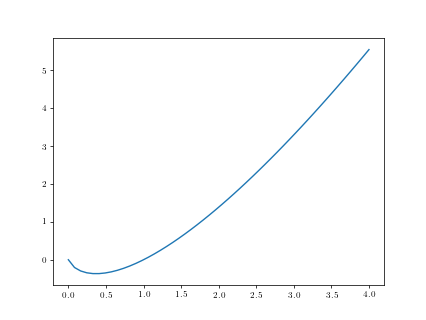

In [7]:
x_range = np.linspace(1e-10, 4)
plt.plot(x_range, x_range * np.log(x_range))

<IPython.core.display.Javascript object>


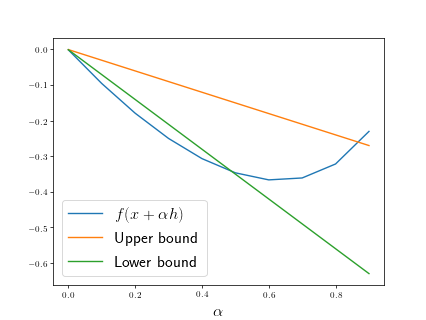

In [8]:
x0 = 1
f = lambda x: x * np.log(x)
grad = lambda x: np.log(x) + 1
beta1 = 0.3
beta2 = 0.7
plot_alpha(f, grad, x0, -grad(x0), np.linspace(1e-3, 0.9, 10), beta1, beta2)

### Backtracking 

```python
def SelectStepSize(x, f, h, rho, alpha0, beta1, beta2):
    
    # 0 < rho < 1
    
    # alpha0 - initial guess of step size
    
    # beta1 and beta2 - constants from conditions
    
    alpha = alpha0
    
    # Check violating sufficient decrease and curvature conditions
    
    while (f(x - alpha * h) >= f(x) + beta1 * alpha grad_f(x_k).dot(h)) and 
    
          (grad_f(x - alpha * h).dot(h) <= beta2 * grad_f(x_k).dot(h)):
            
        alpha *= rho
        
    return alpha

```

## Теоремы сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 4;  гл. 3, $\S$ 1; Ю.Е. Нестеров Введение в выпуклую оптимизацию, $\S$ 2.2)
От общего к частному:

**Теорема 1.** 
Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:

$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$

а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

**Теорема 2.** Пусть
- $f(x)$ дифференцируема на $\mathbb{R}^n$
- $f(x)$ выпукла 
- $f'(x)$ удовлетворяет условию Липшица с константой $L$
- $\alpha = \dfrac{1}{L}$

Тогда 

$$
f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
$$


**Теорема 3.**
Пусть 
- $f(x)$ дважды дифференцируема и $\mu\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$ для всех $x$
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда 

$$
\| x_k - x^*\|_2 \leq \|x_0 - x^*\|_2 q^k, \qquad q = \max(|1 - \alpha l|, |1 - \alpha L|) < 1
$$

и минимальное $q^* = \dfrac{L - \mu}{L + \mu}$ при $\alpha^* = \dfrac{2}{L + \mu}$

### От чего зависит $q^*$ и как это использовать?
Из Теоремы 3 имеем 

$$
q^* = \dfrac{L - \mu}{L + \mu} = \dfrac{L/\mu - 1}{L/\mu + 1} = \dfrac{M - 1}{M + 1},
$$

где $M$ - оценка числа обусловленности $f''(x)$.

**Вопрос**: что такое число обусловленности матрицы?

- При $M \gg 1$, $q^* \to 1 \Rightarrow$ оооочень **медленная** сходимости градиентного метода. Например при $M = 100$: $q^* \approx 0.98 $
- При $M \simeq 1$, $q^* \to 0 \Rightarrow$ **ускорение** сходимости градиентного метода. Например при $M = 4$: $q^* = 0.6 $

**Вопрос**: какая геометрия у этого требования?

**Мораль**: необходимо сделать оценку $M$ как можно ближе к 1!

О том, как это сделать, Вам будет предложено подумать в домашнем задании :)

## Вычислительный аспект и эксперименты
1. Для каждого шага метода нужно хранить только текущую точку и вектор градиента: $O(n)$ памяти
2. Поиск $\alpha_k$:

    - дан априори
    - ищется из аналитического решения задачи наискорейшего спуска
    - заканчивается за конечное число шагов
3. Для каждого шага метода нужно вычислять линейную комбинацию векторов: $O(n)$ вычислений + высокопроизводительные реализации

### Pеализация градиентного спуска

In [5]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        alpha = line_search(x, -gradient, **opt_arg)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

### Выбор шага

Реализации различных способов выбора шага приведены [тут](https://github.com/amkatrutsa/liboptpy/blob/master/step_size.py)

### Зависимость от обусловленности матрицы $f''(x)$
Рассмотрим задачу 
$$
\min f(x),
$$ 
где
$$ f(x) = x^{\top}Ax, \; A = \begin{bmatrix} 1 & 0\\ 0 & \gamma \end{bmatrix} $$

$$
f'(x) = 2Ax
$$

In [25]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

Maximum iteration exceeds!
Maximum iteration exceeds!
Maximum iteration exceeds!
Maximum iteration exceeds!
Maximum iteration exceeds!
Maximum iteration exceeds!


<IPython.core.display.Javascript object>


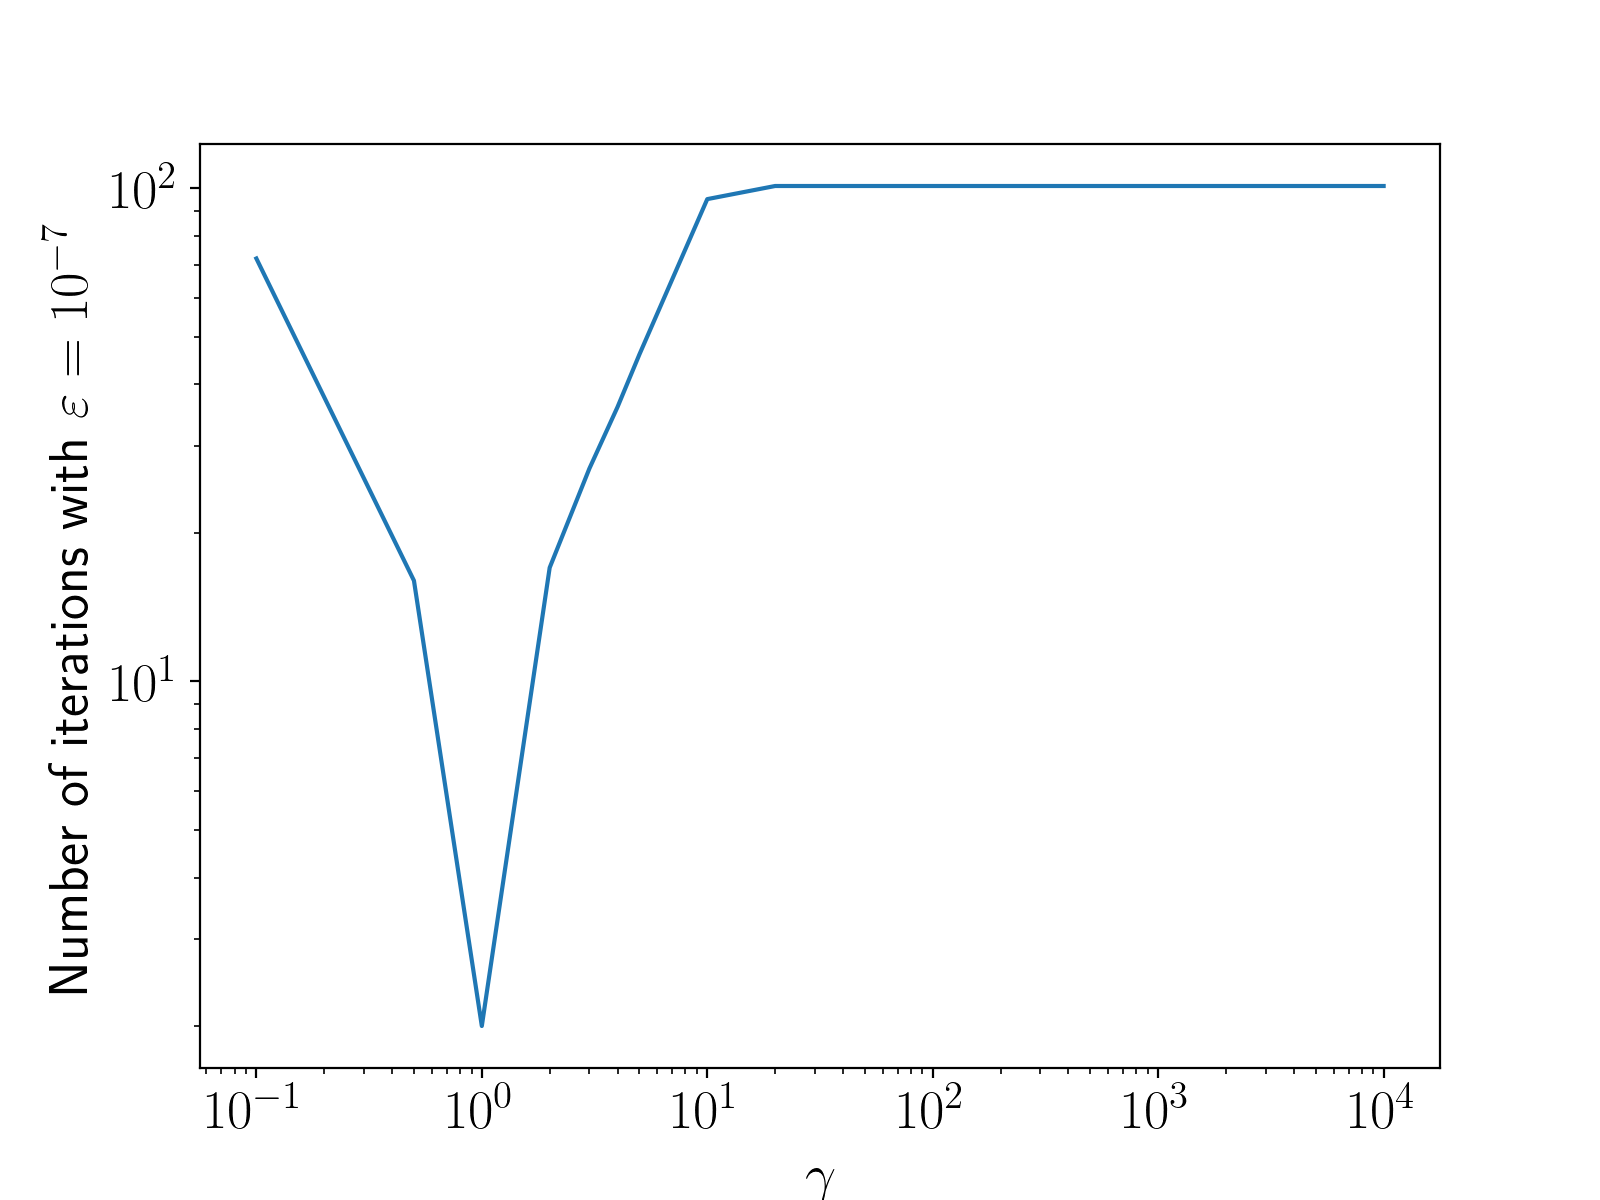

Text(0, 0.5, 'Number of iterations with $\\varepsilon = 10^{-7}$')

In [26]:
plt.rc("text", usetex=True)

gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
#     x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
    x0 = np.array([g, 1], dtype=np.float64)
#     print x0[1] / x0[0]
    gd = methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd.solve(x0, tol=1e-7, max_iter=100)
    num_iter_converg.append(len(gd.get_convergence()))

plt.figure(figsize=(8, 6))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)

- При неудачном начальном приближении сходимость для плохо обусловенной задачи очень медленная
- При случайном начальном приближении сходимость может быть гораздо быстрее теоретических оценок
- **Open problem:** получить оценки сходимости, использующие случайное начальное приближение, а не худшее из возможных

## Эксперимент на многомерной задаче
Пусть $A \in \mathbb{R}^{m \times n}$. Рассмотрим систему линейных неравенств: $Ax \leq 1$ при условии $|x_i| \leq 1$ для всех $i$.

**Определение.** Аналитическим центром системы неравенств $Ax \leq 1$ при условии $|x_i| \leq 1$ является решение задачи
$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$
$$
f'(x) - ?
$$

In [3]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

### Точное решение с помощью CVXPy

In [4]:
import cvxpy as cvx
print(cvx.installed_solvers())
x = cvx.Variable(n)

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True)
x = x.value
print("Optimal value =", prob.value)

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'MOSEK', 'OSQP', 'SCS']
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 20700, CG tol ~ 1/iter^(2.00)
eps = 1.00e-04, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 500, constraints m = 1200
Cones:	soc vars: 300, soc blks: 100
	exp vars: 900, dual exp vars: 0
Setup time: 2.24e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.33e+02  2.71e+03  7.93e-01 -3.36e+04 -3.87e+03  0.00e+00  5.42e-03 
   100| 3.60e-06  7.97e-05  3.19e-06 -6.50e+02 -6.50e+02  1.44e-13  2.58e-01 
-------------------

### Решение с помощью градиентного спуска

In [5]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

Required tolerance achieved!
Convergence in 15 iterations
Function value = -650.1685638068079
Norm of gradient = 5.547278995996568e-06


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


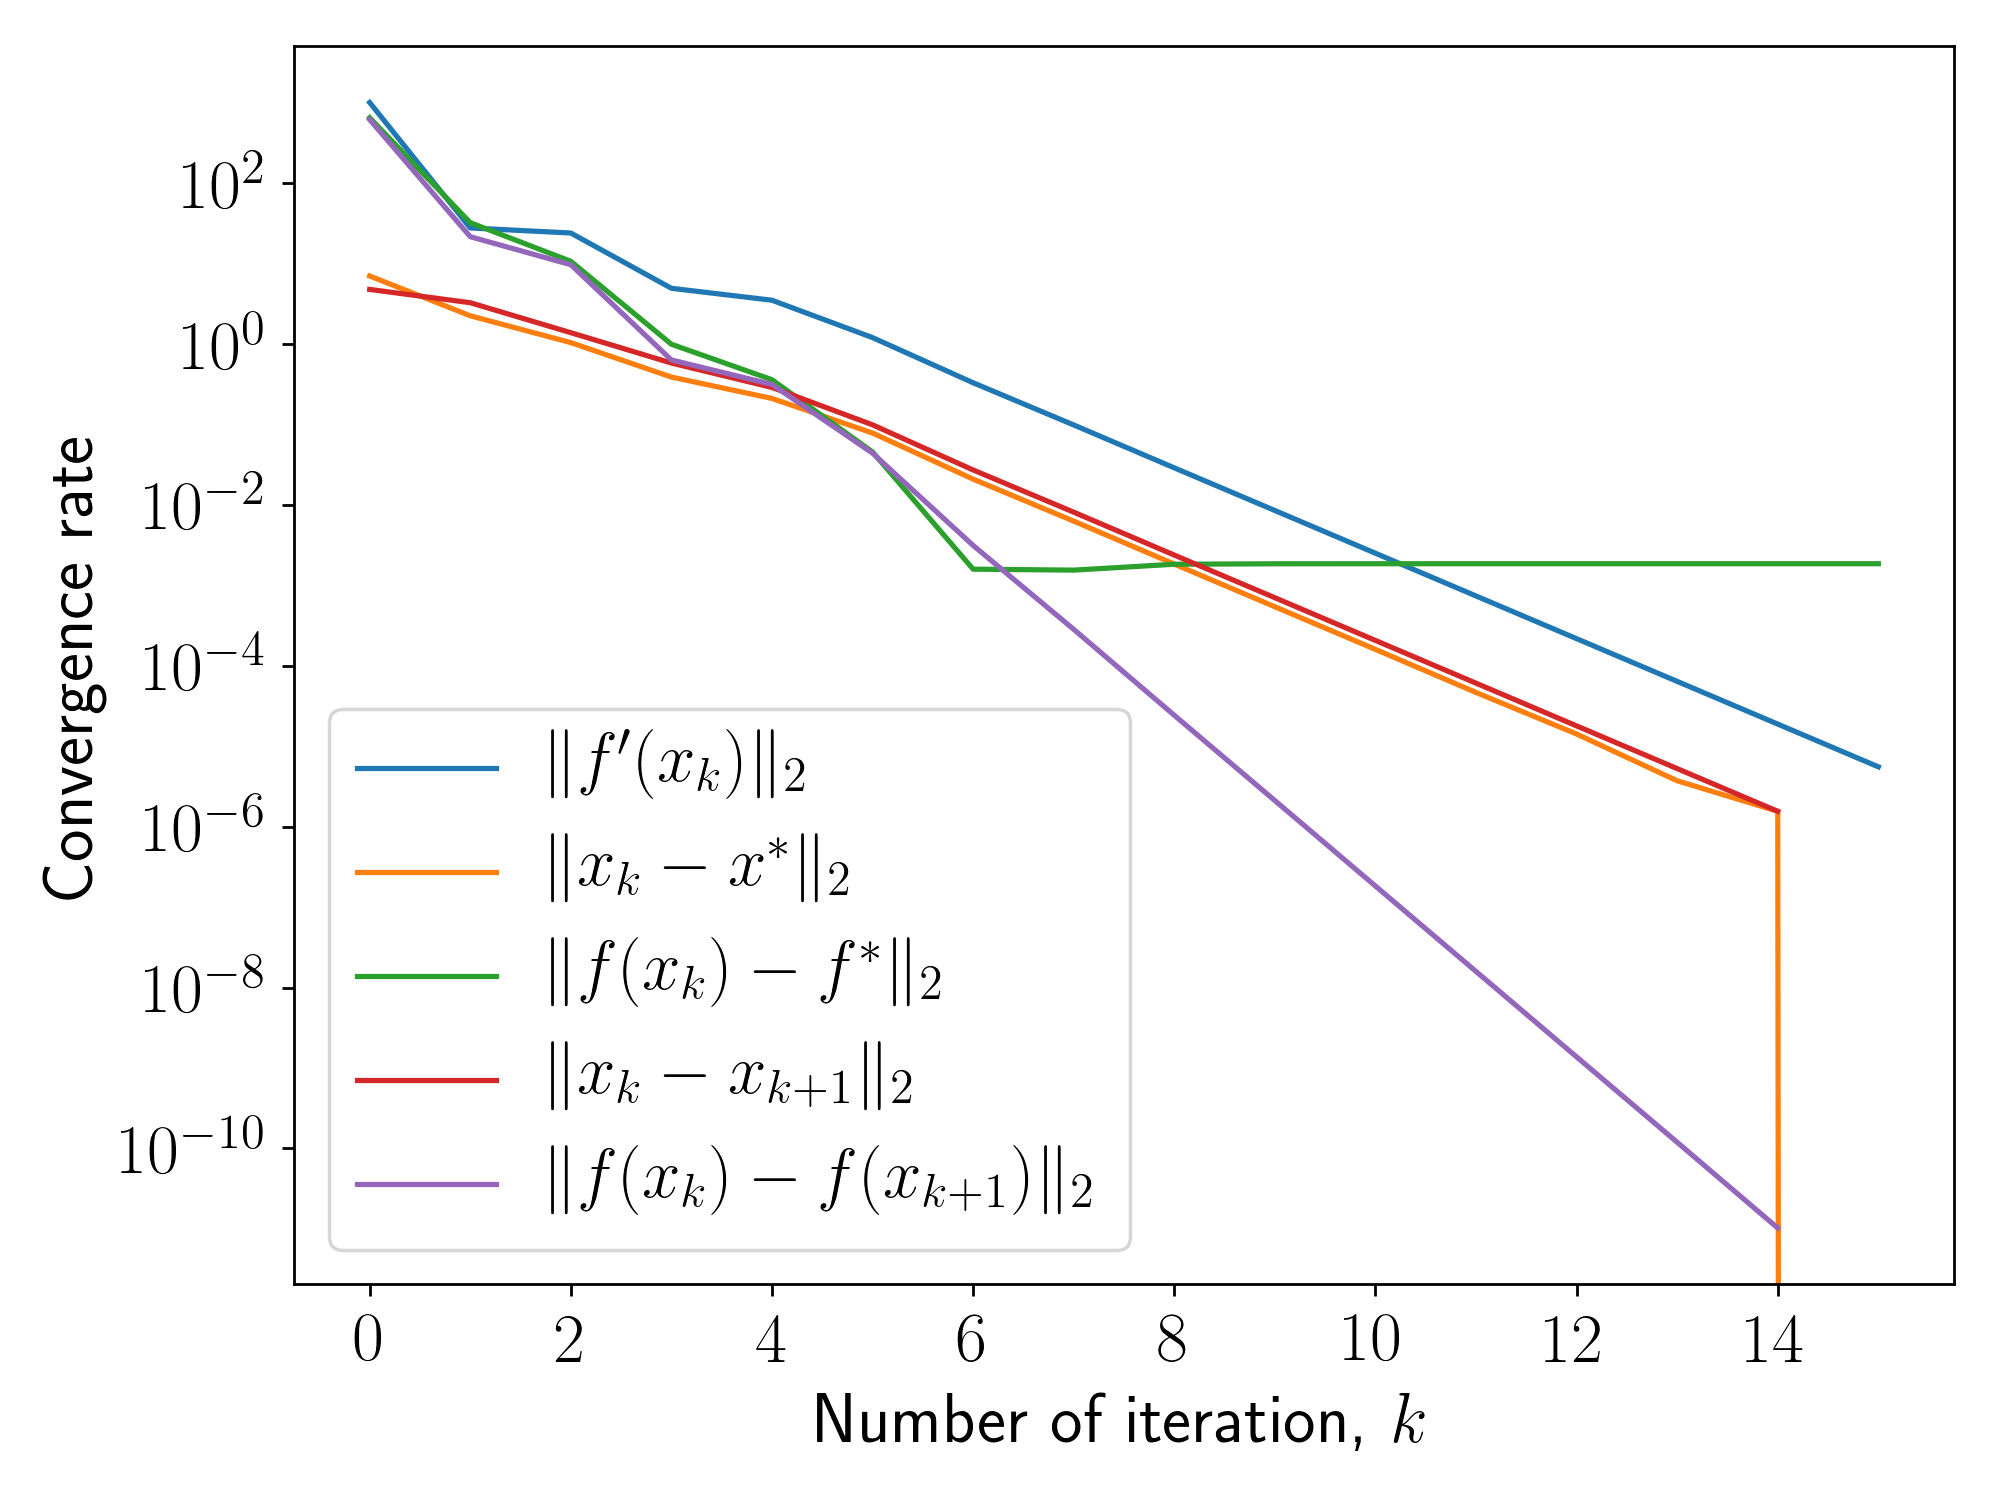

In [6]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x = gd.solve(x0, tol=1e-5, max_iter=100, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.semilogy([np.linalg.norm(np.array(x_conv[i]) - np.array(x_conv[i+1])) for i in range(len(x_conv) - 1)], label=r"$\|x_k - x_{k+1}\|_2$")
plt.semilogy([np.linalg.norm(f(np.array(x_conv[i])) - f(np.array(x_conv[i+1]))) for i in range(len(x_conv) - 1)], label=r"$\|f(x_k) - f(x_{k+1})\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.tight_layout()

## Pro & Contra

Pro
- легко реализовать
- сходимость как минимум к стационарной точке
- параметры при выборе шага влияют на сходимость не столь сильно
- имеет многочисленные вариации

Contra
- линейная сходимость для сильно выпуклых функций
- очень сильно зависит от числа обусловленности $f''(x)$, выбор начального приближения может помочь
- не является оптимальным для выпуклых функций с липшицевым градиентом и сильновыпуклых функций (см. [ускорение Нестерова](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/))

## Резюме
1. Методы спуска
2. Направление убывания
3. Метод градиентного спуска
4. Правила выбора шага
5. Теоремы сходимости
6. Эксперименты